## Numerical Continuation

Numerical continuation is the process of finding the location of periodic orbits or equilibria as a parameter in the equation is varied. This Method can be used to find the roots of equations or equilibria and orbits of ODEs and systems of ODEs.

Two methods of numerical continuation are implemented in this package, natural parameter continuationa and pseudo-arclength continuation. Examples of both of these methods are contained within this notebook.

First, the following cell must be run to allow imports from the rest of the package.

In [18]:
from os import sys
sys.path.append("..")

Firstly, numerical continuation can be applied to equations, for example, polynomials. The continuation algorithm will find the location of any roots of the equation as a parameter varies. This can be shown with a cubic equation,

$x^{3} - x + c = 0$,

This equation must first be encoded as a Python function as in the following cell.

In [19]:
# Function containing cubic equation parameterised by c
def cubic(x,params):
    c = params['c']
    return x**3 - x + c

Numerical continuation can be applied to the function above using the code shown in the cell below. The parameter, $c$, is to be varied between the values of $-2$ and $2$. The continuation function returns an array containing the values of $x$ for which roots exist for the corresponding parameter values in the list, returned as p.

Initially, natural parameter continuation will be used as, of the two methods, it is the simpler one.

C:\Users\chris\anaconda3\envs\SciVenv\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


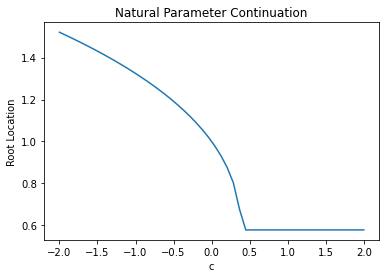

In [20]:
from numerical_continuation import continuation
# Carry out numerical continuation with natural parameter continuation
u, p  = continuation([1], 'c', [-2,2], 50, cubic, method='natural-parameter', c=-2)

# Plot the output
import matplotlib.pyplot as plt
plt.plot(p,u, label='Natural')
plt.xlabel('c'), plt.ylabel('Root Location'), plt.title('Natural Parameter Continuation')
plt.show()

From the graph above, it can be seen that the natural parameter continuation method performs well from values of $c$ between $-2$ and $0.5$. For values greater than this, the algorithm fails to indentify the roots. This is due to the fact that more than one root exists for such values of $c$.

To overcome this, pseudo-arclength continuation can be used, as shown in the following cell.

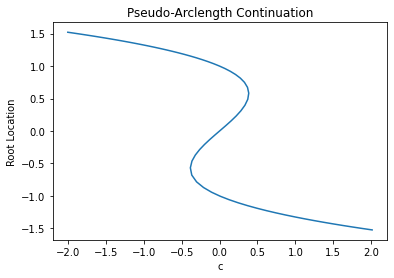

In [21]:
# Carry out numerical continuation with pseudo-arclength continuation
u, p  = continuation([1], 'c', [-2,2], 50, cubic, method='pseudo-arclength', c=-2)

# Plot the output
plt.plot(p,u, label='PA')
plt.xlabel('c'), plt.ylabel('Root Location'), plt.title('Pseudo-Arclength Continuation')
plt.show()

The plot above shows that the pseudo-arclength method performs much more gracefully when the curve of roots turns a `corner'.

The more common use of numerical continuation is to plot out the positions of periodic orbits for certain parameter values for systems of ODEs. This is equivalent to plotting parts of the bifurcation diagram resulting from the system of ODEs.

An example of this will be demonstrated below, using a modified version of the Hopf Bifurcation normal form, where the parameter to be varied is $\beta$,

$\frac{du_{1}}{dt} = \beta u_{1} - u_{2} + u_{1}(u_{1}^{2} + u_{2}^{2}) - u_{1}(u_{1}^{2} + u_{2}^{2})^{2}$,

$\frac{du_{2}}{dt} =  u_{1} + \beta u_{2} + u_{1}(u_{1}^{2} + u_{2}^{2}) - u_{2}(u_{1}^{2} + u_{2}^{2})^{2}$,

which can be encoded as a Python function as shown in the following cell.

In [22]:
def modified_hopf(X, t, params):
    '''
    Function containing the modified Hopf normal form system of ODEs.

    Parameters
    ----------
    X : np.array
        Array containing the system state variables, u1 and u2.
    t : float
        The time to evaluate the system at.
    params : dict
        Dictionary containing the parameter requires for this system (beta).

    Returns
    -------
    X : list
        List containing the gradients with respect to time for u1 and u2.
    '''

    beta = params['beta']

    u1 = X[0]
    u2 = X[1]

    du1dt = beta*u1 - u2 + u1*(u1**2 + u2**2) - u1*(u1**2 + u2**2)**2
    du2dt = u1 + beta*u2 + u2*(u1**2 + u2**2) - u2*(u1**2 + u2**2)**2

    X = [du1dt, du2dt]

    return X

When applying numerical continuation to ODEs or systems of ODEs, the periodic orbits are found using numerical shooting, therefore, it is necessay to define a phase condition to fix the position of the orbits found. The phase condition, 

$\frac{du_{1}(t=0)}{dt}=0$,

can be encoded as a Python function as in the following cell.

In [23]:
def pc_modified_hopf(X0, **params):
    '''
    Function containing the phase condition described above for the modified Hopf ODE system

    Parameters
    ----------
    X0 : np.array
        The proposed intial conditions of a periodic orbit.
    **params:
        Any parameters required to evaluate the system.

    Returns
    -------
    pc : float
        The gradient of u1 with respect to t at t=0.
    '''
    # returns du1dt at t=0 (to be set =0)
    pc = modified_hopf(X0, 0, params)[0]
    return pc

Initially using natural parameter continuation, the orbits can be found for various values of $\beta$ as follows,

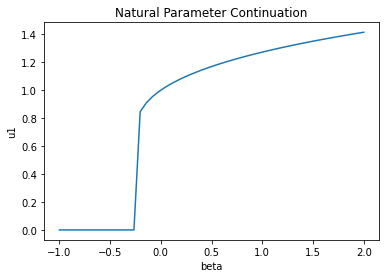

In [24]:
# Carry out the numerical continuation using natural parameter continuation
u, p =  continuation([1,1], 'beta', [2,-1], 50, modified_hopf, 'natural-parameter', 'numerical-shooting', phase_condition=pc_modified_hopf, T_guess=6, beta=-1)

# Plot the output
plt.plot(p,u[:,0], label='PA')
plt.xlabel('beta'), plt.ylabel('u1'), plt.title('Natural Parameter Continuation')
plt.show()

Similarly to the cubic equation, natural parameter continuation struggles when there is a `corner'. Therefore, the more robust pseudo-arclength method can be used as shown in the following cell.

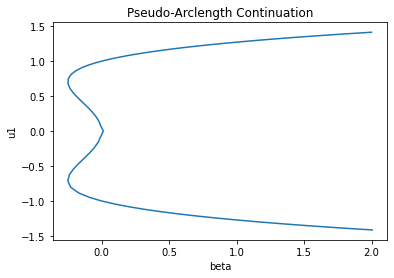

In [25]:
# Carry out the numerical continuation using pseudo-arclength continuation
u, p =  continuation([1,1], 'beta', [2,-1], 50, modified_hopf, 'pseudo-arclength', 'numerical-shooting', phase_condition=pc_modified_hopf, T_guess=6, beta=-1)

# Plot the output
plt.plot(p,u[:,0], label='PA')
plt.xlabel('beta'), plt.ylabel('u1'), plt.title('Pseudo-Arclength Continuation')
plt.show()

The methods described here can be used for equations and systems of ODEs of arbitrary dimensions.